In [4]:
import numpy as np

from scipy.signal import butter
from scipy.signal import lfilter
from scipy.io import wavfile

from utils import postprocess

import matplotlib.pyplot as plt

import IPython.display as ipd

from utils import params

from models.research.audioset.vggish_input  import wavfile_to_examples, waveform_to_examples

In [2]:
%matplotlib inline

In [7]:
# LOAD DATA
#DEFINE DATASET AND BINARY LABEL CRITERIA
dfile = "./output/pandas/embeddings_16bit_aug.pickle"
fout = "./output/csv/sonitrol_16bit_aug.csv"

# LOAD DATA AND CONVERT TO BINARY
df,ndata = postprocess.load_pd_data(dfile,norm=True,nfeatures=640)
labels = df['labels'].get_values()
blabels = ['indistinguishable' if x <100 else 'distinguishable' for x in labels]
df['blabels'] = blabels
df.to_csv(fout)

In [4]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def plot_composite_fft(dfiles):
    
    plt.figure(figsize=(15,7))
    plt.title("Power Spectrum",size=24)
    count=1
    tmax = []
    for dfile in dfiles:
        rate,wave = wavfile.read(dfile)
        if len(wave)!=110250:
            continue
        pow_spec = np.abs(np.fft.fft(wave))**2
        plt.plot(pow_spec[:int(len(pow_spec)/2.0)],label='Sample'+str(count),linewidth=2.0)
        tmax.append(max(pow_spec))
        count+=1

    plt.ylabel("Amplitude (Arbitrary Units)",size=20)
    plt.xlabel("Frequency (Hz)",size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.grid(color="gray",linestyle="--")
    plt.axis([0,len(pow_spec)/2.0,0,1e16])
    #plt.legend()
    plt.show()
    
    return

In [5]:
wfiles = params.wavfiles
lfiles = params.labfiles

wfiles_reduced = wfiles[0:200]

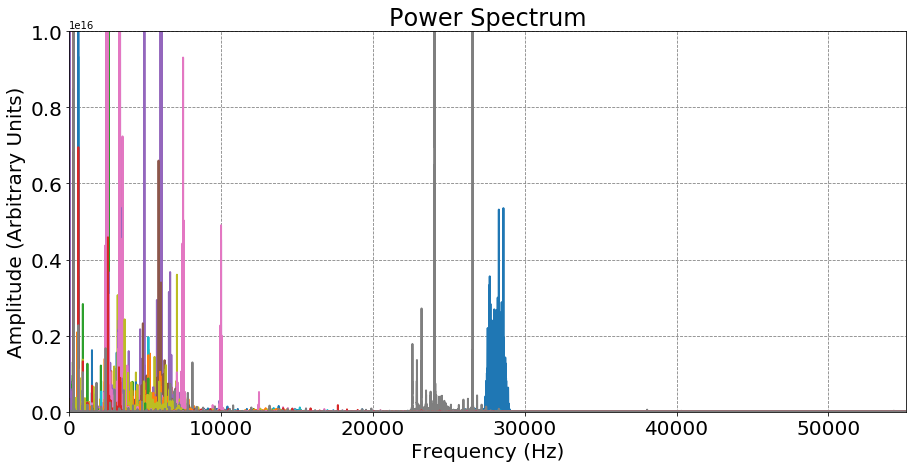

In [6]:
plot_composite_fft(wfiles_reduced)

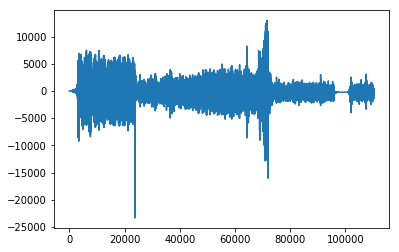

In [21]:
rate,data = wavfile.read(wfiles[1000])
plt.plot(data)

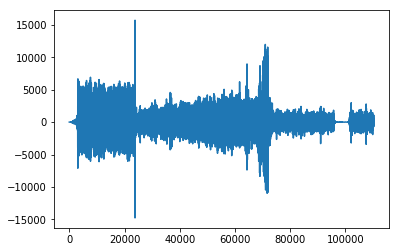

In [22]:
cdata = butter_bandpass_filter(data,200,8000,rate)
plt.plot(cdata)

In [19]:
ipd.Audio(cdata,rate=rate)

In [20]:
ipd.Audio(data,rate=rate)

-- Unfiltered Wave


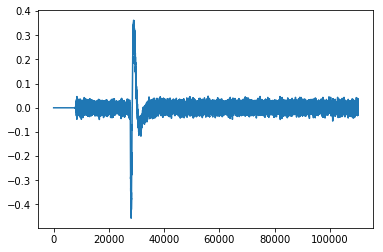

0


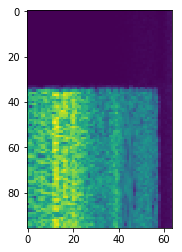

1


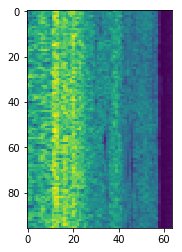

2


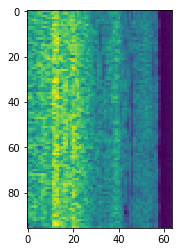

3


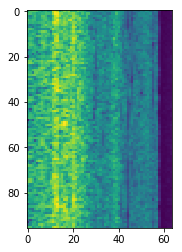

4


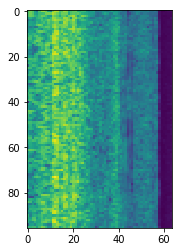

-- Filtered Wave


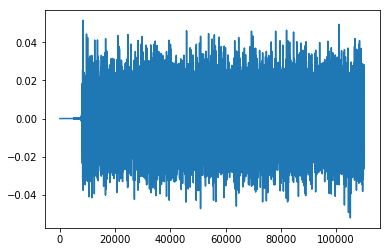

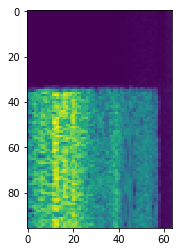

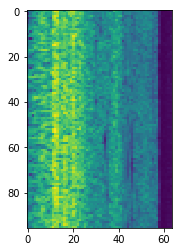

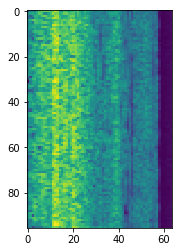

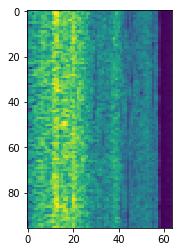

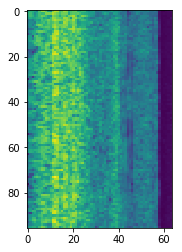

In [52]:
rate,data = wavfile.read(wfiles[100])

print "-- Unfiltered Wave"
swave1 = data / 32768.0
mgram1 = waveform_to_examples(swave1,rate)
plt.plot(swave1)
plt.show()

for tslice in range(mgram1.shape[0]):
    print tslice
    plt.imshow(mgram1[tslice,:,:])
    plt.show()

print "-- Filtered Wave"
swave2 = butter_bandpass_filter(swave1,200,8000,rate)
mgram2 = waveform_to_examples(swave2,rate)
plt.plot(swave2)
plt.show()

for tslice in range(mgram2.shape[0]):
    plt.imshow(mgram2[tslice,:,:])
    plt.show()

(5, 96, 64)


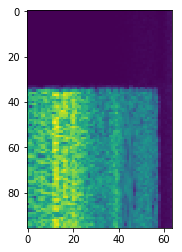

In [61]:
print mgram1.shape
mgram3 = np.roll(mgram1,1,axis=0)
plt.imshow(mgram3[1,:,:])

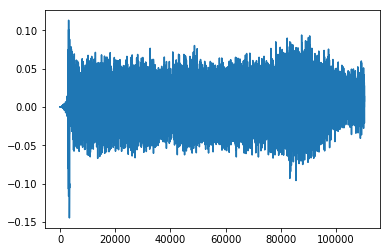

0


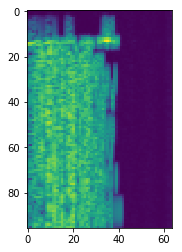

1


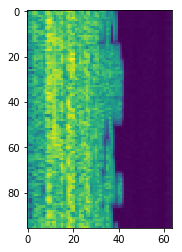

2


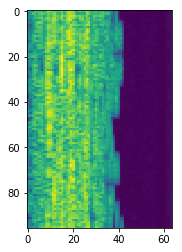

3


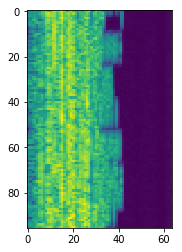

4


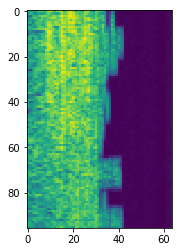

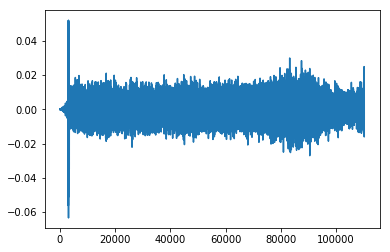

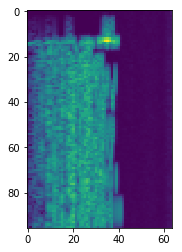

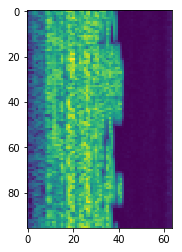

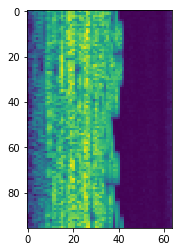

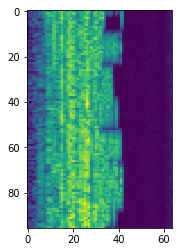

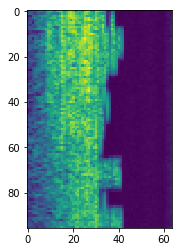

In [70]:
rate,data = wavfile.read(wfiles[3])
swave1 = data / 32768.0
mgram1 = waveform_to_examples(swave1,rate)

plt.plot(swave1)
plt.show()

for tslice in range(mgram1.shape[0]):
    print tslice
    plt.imshow(mgram1[tslice,:,:])
    plt.show()

pre_emphasis=0.95
emphasized_signal = np.append(swave1[0], swave1[1:] - pre_emphasis * swave1[:-1])
mgram2 = waveform_to_examples(emphasized_signal,rate)
plt.plot(emphasized_signal)
plt.show()

for tslice in range(mgram2.shape[0]):
    plt.imshow(mgram2[tslice,:,:])
    plt.show()

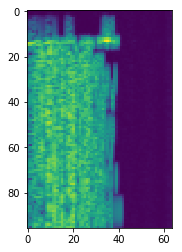

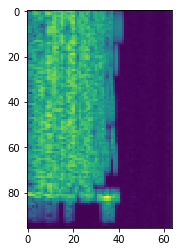

In [75]:
plt.imshow(mgram1[0,:,:])
plt.show()

f_mgram1 = np.flip(mgram1,1)
plt.imshow(f_mgram1[0,:,:])
plt.show()